In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr

import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
# Load csv file 
all_df = pd.read_csv('./Iris.csv', index_col=False)
all_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# drop ID column
all_df.drop('Id',axis=1,inplace=True)
all_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Use info() to get description of data
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# basic statistics for each column
all_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
all_df["Species"].value_counts()# looks at Cabin data 

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

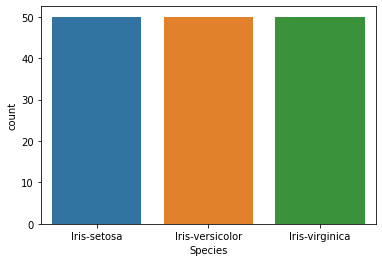

In [7]:
# draw a bar chart for each label
sns.countplot(x="Species", data=all_df)

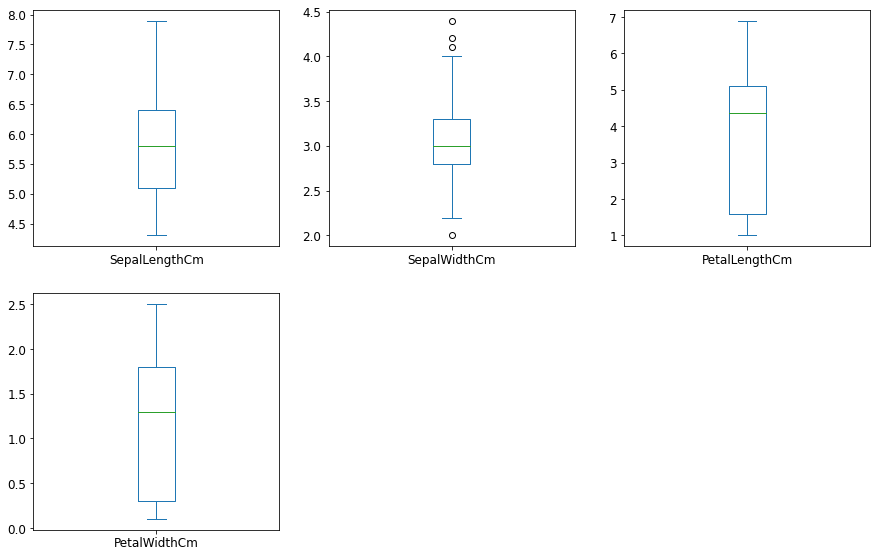

In [8]:
# Use box plot to check the value range and outliers of each feature
data_mean = all_df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(4,3), sharex=False, fontsize=12, figsize=(15,20));

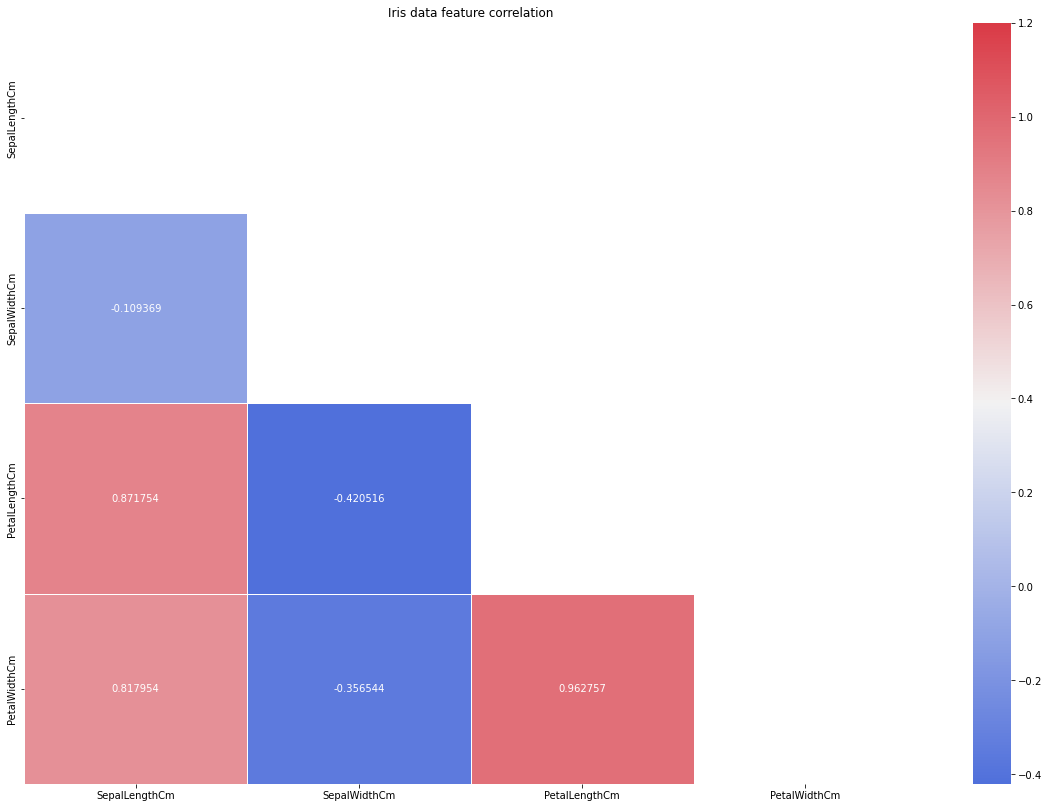

In [9]:
# Compute the correlation matrix to observe the correlation between pair of features
corrMatt = all_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20,14))
plt.title("Iris data feature correlation")

# Generate a custom diveraging colourmap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, ax=ax, annot=True, fmt='2g',linewidths=1);

In [34]:
# Assign features to X
X = all_df

# transform Embarked into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Species']= le.fit_transform(X['Species'])

# assign numerical label to y
Y = X['Species']
X = X.drop('Species', axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot:>

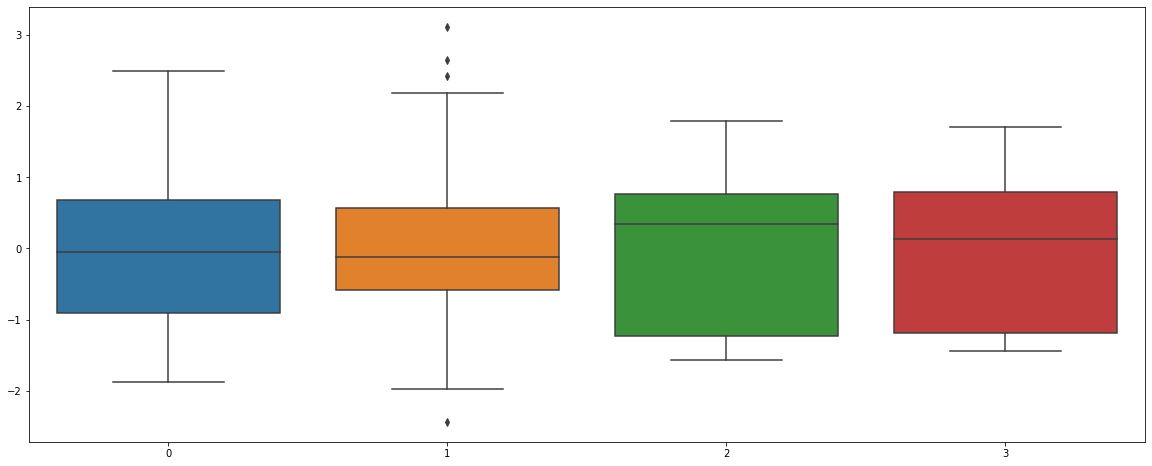

In [37]:
# Normalise the features to use zero mean normalisation
# Only for the first 10 features, but try yourself to visualise more features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
fig, ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs, ax=ax)

In [38]:
X.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
# Then stratified sampling, Divide data into training and testing sets.
# Pay attention that we are using the normalised data value Xs rather than X 

Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, Y, test_size=0.3, random_state=1, stratify=Y)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from tqdm import tqdm_notebook as tqdm


models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Test options and evaluation metric
num_folds = 10
num_instances = len(Xs)
scoring = 'accuracy'
results = []
names = []
for name, model in tqdm(models):
    kf = KFold(n_splits = num_folds)
    cv_results = cross_val_score(model, Xs, Y, cv=kf, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    
print('5-fold cross-validation accuracy score for the training data for all the classifiers')
for name, cv_results in zip(names, results):
    print("%-10s: %.6f (%.6f)" % (name, cv_results.mean(), cv_results.std()))

/tmp/ipykernel_37215/72090393.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for name, model in tqdm(models):


  0%|          | 0/6 [00:00<?, ?it/s]

5-fold cross-validation accuracy score for the training data for all the classifiers
LR        : 0.946667 (0.065320)
LDA       : 0.966667 (0.061464)
KNN       : 0.926667 (0.081377)
CART      : 0.940000 (0.069602)
NB        : 0.946667 (0.058119)
SVM       : 0.946667 (0.058119)


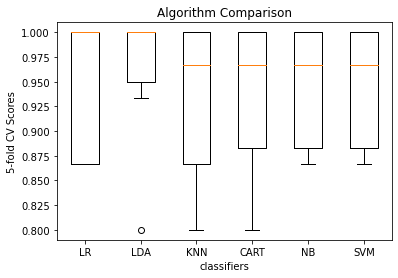

In [42]:
# Compare the algorithms 
plt.title('Algorithm Comparison')
plt.boxplot(results)
plt.xlabel('classifiers')
plt.ylabel('5-fold CV Scores')
plt.xticks(np.arange(len(names)) + 1, names);